<a href="https://colab.research.google.com/github/theresiasns/capstone/blob/main/VGG16_corn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import os

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
base_dir="/content/drive/MyDrive/corn/"
!ls"/content/drive/MyDrive/corn/"

/bin/bash: ls/content/drive/MyDrive/corn/: No such file or directory


In [4]:
directory = os.path.join(base_dir)

In [5]:
train_dir = os.path.join(directory, 'train')
validation_dir = os.path.join(directory, 'val')

In [6]:
Name=[]
for file in os.listdir(train_dir):
    Name+=[file]
print(Name)
print(len(Name))

['Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']
4


In [7]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [8]:
img_width, img_height = 224, 224
batch_size=32

In [9]:
# Pra-pemrosesan gambar
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 3080 images belonging to 4 classes.
Found 772 images belonging to 4 classes.


In [10]:
# Memuat model VGG16 tanpa lapisan klasifikasi
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [11]:
# Menambahkan lapisan klasifikasi baru
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

In [12]:
# Menggabungkan model dasar VGG16 dengan lapisan klasifikasi baru
model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
# Mematikan pembelajaran pada lapisan dasar
for layer in base_model.layers:
    layer.trainable = False

In [14]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
history= model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/50
96/96 [==============================] - 1280s 13s/step - loss: 1.3137 - accuracy: 0.4052 - val_loss: 1.0068 - val_accuracy: 0.7266
Epoch 2/50
96/96 [==============================] - 54s 565ms/step - loss: 0.9885 - accuracy: 0.6247 - val_loss: 0.8249 - val_accuracy: 0.7422
Epoch 3/50
96/96 [==============================] - 55s 572ms/step - loss: 0.8092 - accuracy: 0.7224 - val_loss: 0.7085 - val_accuracy: 0.7695
Epoch 4/50
96/96 [==============================] - 56s 581ms/step - loss: 0.6946 - accuracy: 0.7749 - val_loss: 0.6210 - val_accuracy: 0.7917
Epoch 5/50
96/96 [==============================] - 56s 578ms/step - loss: 0.6163 - accuracy: 0.8025 - val_loss: 0.5513 - val_accuracy: 0.8203
Epoch 6/50
96/96 [==============================] - 55s 577ms/step - loss: 0.5566 - accuracy: 0.8136 - val_loss: 0.5128 - val_accuracy: 0.8281
Epoch 7/50
96/96 [==============================] - 52s 538ms/step - loss: 0.5197 - accuracy: 0.8251 - val_loss: 0.4777 - val_accuracy: 0.8372

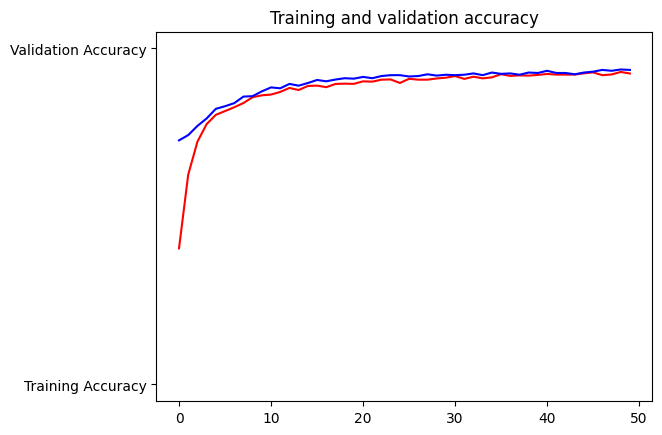

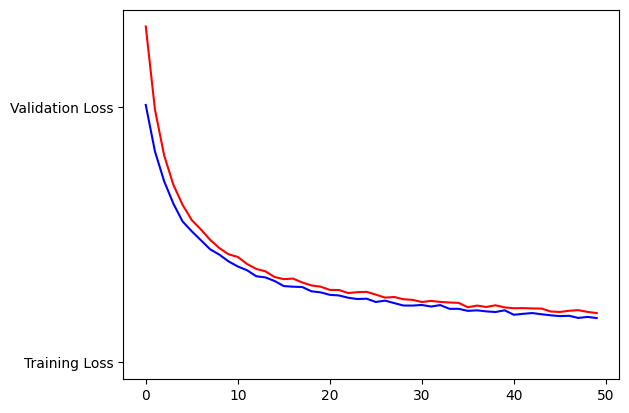

In [16]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [23]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(224,224))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)

  print(classes[0])
  value=np.argmax(classes)
  move_name=mapper(value)
  
  print("Prediction is {}.".format(move_name))

Saving RS_Rust 1577.JPG to RS_Rust 1577.JPG
1/1 [==============================] - 0s 20ms/step
[2.8057066e-03 9.9115270e-01 6.0414993e-03 1.0654308e-07]
Prediction is Corn_(maize)___healthy.
